In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm

In [2]:
tickers = pd.read_csv('tickers2trade.csv')['Symbol'].tolist()

In [3]:
# extract close data locally from datasets

import os

folder = 'data'
directories = ['data/2022', 'data/2023', 'data/2024']

open_data_dict = {}
unavailable_tickers = []

# Loop through each ticker
for ticker in tickers:
    # Loop through each directory
    curr_data = pd.DataFrame()
    available = True
    for directory in directories:
        # Get the file path
        file_path = os.path.join(directory, f'{ticker}.csv')
        # Read the data
        if not os.path.exists(file_path):
            print(f"File not found: {file_path}")
            unavailable_tickers.append(ticker)
            available = False
            break  # if no current ticker in any years, ignore this ticker
        data = pd.read_csv(file_path, index_col='DateTime', parse_dates=True)
        # Filter data from 9:30 to 4 pm for all days
        data = data.between_time('09:30', '16:00')

        # Append the data to the curr_data DataFrame
        if curr_data.empty:
            curr_data = data['Close']
        else:
            curr_data = pd.concat([curr_data, data['Close']])

    if not available:
        continue
    curr_data = curr_data[~curr_data.index.duplicated(keep='first')]
    open_data_dict[ticker] = curr_data

# Combine all data into a single DataFrame
close_data = pd.concat(open_data_dict, axis=1)

File not found: data/2022\GEV.csv
File not found: data/2022\KVUE.csv
File not found: data/2022\SW.csv
File not found: data/2022\VLTO.csv
File not found: data/2022\SOLV.csv
File not found: data/2022\AMTM.csv
File not found: data/2022\BRK-B.csv


In [4]:
close_data = close_data.fillna(method='ffill')
close_data

,AAPL,NVDA,MSFT,AMZN,META,GOOGL,TSLA,BRK.B,GOOG,AVGO,...,BF.B,DVA,FMC,MHK,BEN,WBA,QRVO,PARA,FOX,NWS
DateTime,,,,,,,,,,,,,,,,,,,,,
2022-01-03 09:30:00,178.0799,298.4101,336.256,3360.800,337.4600,2909.4000,1142.830,299.98,2899.060,668.830,...,72.740,114.335,110.29,183.790,33.770,52.670,157.700,30.8600,34.590,22.690
2022-01-03 09:31:00,178.8600,300.4700,337.215,3353.160,338.3950,2912.4250,1139.352,299.96,2904.580,668.800,...,72.570,114.005,110.29,183.790,33.720,52.570,158.190,30.9692,34.650,22.750
2022-01-03 09:32:00,178.8864,301.8491,336.611,3347.280,339.4300,2905.5500,1146.250,299.92,2899.210,669.190,...,72.440,113.545,110.30,183.790,33.720,52.515,158.090,31.1700,34.780,22.800
2022-01-03 09:33:00,179.0381,303.2300,336.910,3344.750,339.8996,2904.9750,1144.450,299.97,2898.700,670.950,...,72.165,113.535,110.63,184.870,33.830,52.600,159.550,31.3128,34.831,22.820
2022-01-03 09:34:00,178.9650,304.0299,336.700,3340.950,339.8805,2903.7700,1144.030,300.10,2896.240,671.095,...,72.100,113.900,110.63,184.750,33.860,52.770,159.490,31.4800,34.880,22.860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-06 15:56:00,242.6900,142.3450,443.670,226.890,624.4600,174.7850,389.276,470.43,176.515,179.315,...,44.185,160.340,56.45,130.535,21.875,8.565,68.120,10.9850,44.620,32.330
2024-12-06 15:57:00,242.6700,142.3605,443.790,226.950,624.0750,174.8181,388.915,470.55,176.560,179.430,...,44.265,160.250,56.45,130.730,21.885,8.555,68.260,10.9850,44.665,32.305
2024-12-06 15:58:00,242.7100,142.3850,443.610,227.045,624.0750,174.7700,388.585,470.50,176.530,179.360,...,44.315,160.180,56.46,130.960,21.920,8.565,68.295,10.9850,44.660,32.300


In [5]:
minute_close_df = close_data.copy()

# 确保数据按时间排序
minute_close_df = minute_close_df.sort_index()

minute_close_df['date'] = minute_close_df.index.date

# 按交易日计算收益率
minute_returns = (
    minute_close_df.groupby('date')
    .apply(lambda x: x.pct_change())
    .reset_index(level=0, drop=True)
)

# 按交易日计算波动率 (5分钟滚动标准差)
minute_volatility = (
    minute_returns.groupby(minute_close_df.index.date)
    .apply(lambda x: x.rolling(window=5, min_periods=1).std())
    .reset_index(level=0, drop=True)
)

# 删除辅助列 'date'
minute_close_df.drop(columns=['date'], inplace=True)

In [6]:
minute_volatility

,AAPL,NVDA,MSFT,AMZN,META,GOOGL,TSLA,BRK.B,GOOG,AVGO,...,BF.B,DVA,FMC,MHK,BEN,WBA,QRVO,PARA,FOX,NWS
DateTime,,,,,,,,,,,,,,,,,,,,,
2022-01-03 09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-03 09:31:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-03 09:32:00,0.002993,0.001636,0.003283,0.000367,0.000204,0.002404,0.006433,0.000047,0.002654,0.000444,...,0.000386,0.000812,0.000064,0.000000,0.001047,0.000603,0.002644,0.002083,0.001426,0.000316
2022-01-03 09:33:00,0.002269,0.001340,0.002331,0.000771,0.000896,0.001721,0.004883,0.000158,0.001880,0.001399,...,0.001037,0.002030,0.001702,0.003393,0.002427,0.001835,0.004982,0.001493,0.001249,0.000919
2022-01-03 09:34:00,0.002155,0.001745,0.002007,0.000670,0.001431,0.001406,0.004010,0.000257,0.001587,0.001217,...,0.001214,0.003233,0.001481,0.003062,0.001987,0.002370,0.004596,0.001242,0.001117,0.000754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-06 15:56:00,0.000330,0.000766,0.000676,0.000656,0.001872,0.001045,0.001355,0.000180,0.001075,0.001388,...,0.002392,0.000630,0.000727,0.001113,0.000946,0.001332,0.001550,0.001684,0.000628,0.000994
2024-12-06 15:57:00,0.000330,0.000764,0.000566,0.000520,0.001811,0.001047,0.001570,0.000204,0.001075,0.001279,...,0.002500,0.000643,0.000590,0.001203,0.000989,0.001407,0.001668,0.001157,0.000651,0.000984
2024-12-06 15:58:00,0.000190,0.000641,0.000564,0.000509,0.001819,0.001052,0.001789,0.000202,0.001082,0.001280,...,0.002435,0.000640,0.000337,0.001307,0.001327,0.001211,0.001397,0.000586,0.000590,0.000974


In [7]:

minutes_per_day = 390  # 每天的分钟数

def calculate_daily_factors(close_data, volatility_data, lookback_days=20):
    """
    计算日频因子，每日回看过去20天的数据。
    
    :param close_data: 包含收盘价的 DataFrame，索引为时间，列为股票代码。
    :param volatility_data: 包含波动率的 DataFrame，索引为时间，列为股票代码。
    :param lookback_days: 回看天数，默认为20天。
    :return: 因子矩阵 DataFrame，每日计算的因子值。
    """
    factors_list = []

    # 确保数据按时间排序
    close_data = close_data.sort_index()
    volatility_data = volatility_data.sort_index()

    # 获取交易日列表
    trading_days = close_data.index.normalize().unique()

    for date in trading_days:
        # 确定回看窗口
        start_time = date - pd.Timedelta(days=lookback_days)
        end_time = date

        # 获取窗口内的收盘价和波动率
        past_close = close_data[(close_data.index > start_time) & (close_data.index <= end_time)]
        past_volatility = volatility_data[(volatility_data.index > start_time) & (volatility_data.index <= end_time)]

        # 如果回看期数据不足，跳过
        if len(past_close) < lookback_days * minutes_per_day * 0.5:  # 至少50%的数据才计算
            continue

        # 对每只股票计算因子
        for ticker in close_data.columns:
            stock_close = past_close[ticker]
            stock_volatility = past_volatility[ticker]

            # 确定高位和低位阈值
            high_threshold = stock_close.quantile(0.8)
            low_threshold = stock_close.quantile(0.2)

            # 构建布尔掩码
            high_mask = stock_close >= high_threshold
            low_mask = stock_close <= low_threshold

            # 筛选高位和低位时间段对应的波动率
            high_vol = stock_volatility[high_mask].mean()
            low_vol = stock_volatility[low_mask].mean()

            # 计算整体波动率
            overall_vol = stock_volatility.mean()

            # 计算因子值
            high_vol_ratio = high_vol / overall_vol if overall_vol > 0 else None
            low_vol_ratio = low_vol / overall_vol if overall_vol > 0 else None

            # 存储结果
            factors_list.append({
                'date': date,
                'ticker': ticker,
                'high_vol_ratio': high_vol_ratio,
                'low_vol_ratio': low_vol_ratio
            })
            
            # print(factors_list[-1])

    # 转换为 DataFrame
    factors_df = pd.DataFrame(factors_list)
    return factors_df

In [8]:
factors_df = calculate_daily_factors(minute_close_df, minute_volatility)

In [9]:
factors_df

,date,ticker,high_vol_ratio,low_vol_ratio
0,2022-01-18,AAPL,0.833180,1.201728
1,2022-01-18,NVDA,0.869845,1.093958
2,2022-01-18,MSFT,0.769028,1.172761
3,2022-01-18,AMZN,0.837925,1.198341
4,2022-01-18,META,0.914193,1.273906
...,...,...,...,...
361314,2024-12-06,WBA,0.909217,1.026565
361315,2024-12-06,QRVO,0.947513,1.007596
361316,2024-12-06,PARA,1.017295,1.018906
361317,2024-12-06,FOX,0.926469,1.190957


In [10]:
factor_high_vol_ratio = pd.pivot_table(factors_df,index='date',columns='ticker',values='high_vol_ratio')
factor_high_vol_ratio

ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2022-01-18,1.074460,0.833180,0.870630,0.857422,0.938812,1.003292,0.882292,0.811591,0.874175,0.942350,...,0.812775,1.048057,1.199799,1.069414,0.980431,0.973688,0.844926,0.922006,0.913248,1.038921
2022-01-19,1.058825,0.841039,0.880280,0.857841,0.908045,1.013340,0.871265,0.869311,0.858300,0.903586,...,0.814279,1.040626,1.224549,1.059112,1.083117,1.014559,0.878471,0.902761,0.895124,1.051537
2022-01-20,1.054237,0.832684,0.893556,0.864240,0.897119,0.986761,0.850799,0.864889,0.858658,0.929067,...,0.803598,1.038228,1.201344,1.059875,1.096186,1.005644,0.924694,0.918725,0.871838,1.055694
2022-01-21,1.053225,0.830154,0.894206,0.860606,0.906274,0.970603,0.843465,0.863101,0.867327,0.914645,...,0.817484,1.038011,1.176013,1.051403,1.095349,0.987897,0.966634,0.929531,0.851780,1.071446
2022-01-24,1.032436,0.867363,0.880209,0.888130,0.846501,0.942697,1.010476,0.921938,0.913726,0.876499,...,0.749091,0.983051,1.150454,1.037770,1.049995,0.942891,0.878514,0.906022,0.904316,1.075963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-02,0.877654,0.847595,0.689852,0.997387,0.947601,1.073235,1.098600,1.058608,1.261053,0.814059,...,0.780570,0.906665,1.132470,0.983644,1.063572,0.893609,0.724197,0.792892,0.727008,0.947020
2024-12-03,0.720520,0.872213,0.670785,1.028456,0.961712,1.100067,1.085542,1.043639,1.298504,0.795930,...,0.839108,0.912535,1.042054,1.015156,1.065687,0.852505,0.697671,0.783630,0.752429,0.969620
2024-12-04,0.717634,0.818287,0.680007,1.045124,0.941907,0.946846,1.095326,1.053533,1.080902,0.810825,...,1.005694,0.913473,0.943637,0.998015,1.160133,0.918433,0.751547,0.790226,0.723762,1.012782


In [11]:
factor_high_vol_ratio.to_pickle('high vol ratio daily.pkl')

In [12]:
factor_high_vol_ratio = pd.read_pickle('high vol ratio daily.pkl')
factor_high_vol_ratio

ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2022-01-18,1.074460,0.833180,0.870630,0.857422,0.938812,1.003292,0.882292,0.811591,0.874175,0.942350,...,0.812775,1.048057,1.199799,1.069414,0.980431,0.973688,0.844926,0.922006,0.913248,1.038921
2022-01-19,1.058825,0.841039,0.880280,0.857841,0.908045,1.013340,0.871265,0.869311,0.858300,0.903586,...,0.814279,1.040626,1.224549,1.059112,1.083117,1.014559,0.878471,0.902761,0.895124,1.051537
2022-01-20,1.054237,0.832684,0.893556,0.864240,0.897119,0.986761,0.850799,0.864889,0.858658,0.929067,...,0.803598,1.038228,1.201344,1.059875,1.096186,1.005644,0.924694,0.918725,0.871838,1.055694
2022-01-21,1.053225,0.830154,0.894206,0.860606,0.906274,0.970603,0.843465,0.863101,0.867327,0.914645,...,0.817484,1.038011,1.176013,1.051403,1.095349,0.987897,0.966634,0.929531,0.851780,1.071446
2022-01-24,1.032436,0.867363,0.880209,0.888130,0.846501,0.942697,1.010476,0.921938,0.913726,0.876499,...,0.749091,0.983051,1.150454,1.037770,1.049995,0.942891,0.878514,0.906022,0.904316,1.075963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-02,0.877654,0.847595,0.689852,0.997387,0.947601,1.073235,1.098600,1.058608,1.261053,0.814059,...,0.780570,0.906665,1.132470,0.983644,1.063572,0.893609,0.724197,0.792892,0.727008,0.947020
2024-12-03,0.720520,0.872213,0.670785,1.028456,0.961712,1.100067,1.085542,1.043639,1.298504,0.795930,...,0.839108,0.912535,1.042054,1.015156,1.065687,0.852505,0.697671,0.783630,0.752429,0.969620
2024-12-04,0.717634,0.818287,0.680007,1.045124,0.941907,0.946846,1.095326,1.053533,1.080902,0.810825,...,1.005694,0.913473,0.943637,0.998015,1.160133,0.918433,0.751547,0.790226,0.723762,1.012782


In [13]:
factor_high_vol_ratio.loc['2024-01-17']

ticker
A       0.828269
AAPL    0.873711
ABBV    1.162033
ABNB    0.953346
ABT     0.890852
          ...   
XYL     0.899795
YUM     0.978370
ZBH     1.125863
ZBRA    0.807839
ZTS     1.008273
Name: 2024-01-17 00:00:00, Length: 497, dtype: float64

In [14]:
factor_low_vol_ratio = pd.pivot_table(factors_df,index='date',columns='ticker',values='low_vol_ratio')
factor_low_vol_ratio

ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2022-01-18,1.068273,1.201728,1.130487,1.193136,1.096744,1.069733,1.145082,1.051680,1.138092,1.048153,...,1.542687,1.151791,1.115502,0.979939,1.017588,1.268597,0.848972,1.002579,1.169397,0.920735
2022-01-19,1.026268,1.111909,1.132615,1.124298,1.162754,1.085227,1.114172,1.046602,1.110841,1.047562,...,1.390098,1.099839,1.085217,1.048766,1.031500,1.231337,0.963830,1.081133,1.115023,0.935994
2022-01-20,1.013981,1.055410,1.132826,1.104635,1.120515,1.075603,0.959182,1.025522,1.129020,1.055018,...,1.314989,1.026268,1.065997,1.070910,1.046175,1.161092,0.962566,1.048084,1.026674,0.956362
2022-01-21,0.980184,1.042553,1.154679,1.092464,1.089864,1.039239,1.010908,1.040668,1.155885,1.040979,...,1.324434,1.018273,1.063045,1.070486,1.031630,1.118514,1.000755,1.059563,1.043097,0.959527
2022-01-24,1.113680,1.192926,1.168272,1.112082,1.189514,0.952255,1.132198,1.151943,1.212143,1.172341,...,1.266291,1.144480,1.044012,1.073977,1.035933,1.184235,1.160438,1.187390,1.147686,1.106323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-02,0.993402,1.015009,1.184614,0.848687,1.160713,1.204075,1.103990,0.944090,0.955058,1.099731,...,0.957375,1.000341,1.053106,1.116905,0.818065,1.042995,1.022176,1.136075,1.077740,1.285035
2024-12-03,1.006266,1.096036,1.214434,0.875124,1.158400,1.196181,1.090867,0.963115,0.955108,1.211457,...,0.957869,1.008512,1.004133,1.126539,0.885621,1.043012,1.023526,1.122745,1.073918,1.325890
2024-12-04,1.007180,1.146035,1.240664,0.907185,1.171844,1.167175,1.074511,0.985514,0.974452,1.079581,...,0.911209,1.009548,0.947016,1.106154,0.887005,1.052653,1.046298,1.157235,1.083336,1.325898


In [15]:
factor_low_vol_ratio.to_pickle('low vol ratio daily.pkl')

In [16]:
factor_low_vol_ratio = pd.read_pickle('low vol ratio daily.pkl')
factor_low_vol_ratio

ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2022-01-18,1.068273,1.201728,1.130487,1.193136,1.096744,1.069733,1.145082,1.051680,1.138092,1.048153,...,1.542687,1.151791,1.115502,0.979939,1.017588,1.268597,0.848972,1.002579,1.169397,0.920735
2022-01-19,1.026268,1.111909,1.132615,1.124298,1.162754,1.085227,1.114172,1.046602,1.110841,1.047562,...,1.390098,1.099839,1.085217,1.048766,1.031500,1.231337,0.963830,1.081133,1.115023,0.935994
2022-01-20,1.013981,1.055410,1.132826,1.104635,1.120515,1.075603,0.959182,1.025522,1.129020,1.055018,...,1.314989,1.026268,1.065997,1.070910,1.046175,1.161092,0.962566,1.048084,1.026674,0.956362
2022-01-21,0.980184,1.042553,1.154679,1.092464,1.089864,1.039239,1.010908,1.040668,1.155885,1.040979,...,1.324434,1.018273,1.063045,1.070486,1.031630,1.118514,1.000755,1.059563,1.043097,0.959527
2022-01-24,1.113680,1.192926,1.168272,1.112082,1.189514,0.952255,1.132198,1.151943,1.212143,1.172341,...,1.266291,1.144480,1.044012,1.073977,1.035933,1.184235,1.160438,1.187390,1.147686,1.106323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-02,0.993402,1.015009,1.184614,0.848687,1.160713,1.204075,1.103990,0.944090,0.955058,1.099731,...,0.957375,1.000341,1.053106,1.116905,0.818065,1.042995,1.022176,1.136075,1.077740,1.285035
2024-12-03,1.006266,1.096036,1.214434,0.875124,1.158400,1.196181,1.090867,0.963115,0.955108,1.211457,...,0.957869,1.008512,1.004133,1.126539,0.885621,1.043012,1.023526,1.122745,1.073918,1.325890
2024-12-04,1.007180,1.146035,1.240664,0.907185,1.171844,1.167175,1.074511,0.985514,0.974452,1.079581,...,0.911209,1.009548,0.947016,1.106154,0.887005,1.052653,1.046298,1.157235,1.083336,1.325898


In [17]:
stocks_data = pd.read_pickle('all_data.pkl')
stocks_data

Adj Close       Close        High         Low        Open  \
Ticker Date                                                                     
A      2022-01-04  148.364456  151.190002  155.630005  149.699997  155.490005   
       2022-01-05  145.822845  148.600006  153.100006  148.529999  150.830002   
       2022-01-06  146.333130  149.119995  149.960007  145.580002  148.850006   
       2022-01-07  142.437271  145.149994  149.729996  145.089996  149.119995   
       2022-01-10  142.447113  145.160004  145.309998  140.860001  143.289993   
...                       ...         ...         ...         ...         ...   
ZTS    2024-12-12  178.839996  178.839996  179.699997  176.559998  176.949997   
       2024-12-13  178.179993  178.179993  181.850006  176.630005  178.979996   
       2024-12-16  175.809998  175.809998  179.289993  175.789993  177.990005   
       2024-12-17  170.789993  170.789993  177.320007  169.520004  175.000000   
       2024-12-18  167.009995  167.009995  170.940002  166.899994  170.070007   

                      Volume  Adjustment Factor    Adj Open    Adj High  \
Ticker Date                                                               
A      2022-01-04  2234000.0           0.981311  152.584098  152.721481   
       2022-01-05  2370500.0           0.981311  148.011165  150.238746   
       2022-01-06  2298300.0           0.981311  146.068187  147.157443   
       2022-01-07  2058600.0           0.981311  146.333077  146.931677   
       2022-01-10  2548100.0           0.981311  140.612051  142.594304   
...                      ...                ...         ...         ...   
ZTS    2024-12-12  1936000.0           1.000000  176.949997  179.699997   
       2024-12-13  1650300.0           1.000000  178.979996  181.850006   
       2024-12-16  1938800.0           1.000000  177.990005  179.289993   
       2024-12-17  3018300.0           1.000000  175.000000  177.320007   
       2024-12-18  2728300.0           1.000000  170.070007  170.940002   

                      Adj Low                       Name    Industry  \
Ticker Date                                                            
A      2022-01-04  146.902297  Agilent Technologies Inc.  Healthcare   
       2022-01-05  145.754146  Agilent Technologies Inc.  Healthcare   
       2022-01-06  142.859295  Agilent Technologies Inc.  Healthcare   
       2022-01-07  142.378395  Agilent Technologies Inc.  Healthcare   
       2022-01-10  138.227473  Agilent Technologies Inc.  Healthcare   
...                       ...                        ...         ...   
ZTS    2024-12-12  176.559998                Zoetis Inc.  Healthcare   
       2024-12-13  176.630005                Zoetis Inc.  Healthcare   
       2024-12-16  175.789993                Zoetis Inc.  Healthcare   
       2024-12-17  169.520004                Zoetis Inc.  Healthcare   
       2024-12-18  166.899994                Zoetis Inc.  Healthcare   

                          value  
Ticker Date                      
A      2022-01-04  4.565950e+10  
       2022-01-05  4.487732e+10  
       2022-01-06  4.503436e+10  
       2022-01-07  4.383542e+10  
       2022-01-10  4.383844e+10  
...                         ...  
ZTS    2024-12-12  8.068635e+10  
       2024-12-13  8.038858e+10  
       2024-12-16  7.931932e+10  
       2024-12-17  7.705447e+10  
       2024-12-18  7.534907e+10  

[368504 rows x 13 columns]

In [18]:
data_high = {
    'Ticker': list(factor_high_vol_ratio.columns) * len(factor_high_vol_ratio.index),   
    'Date': np.repeat(factor_high_vol_ratio.index, len(factor_high_vol_ratio.columns)), 
    'high_vol_ratio': factor_high_vol_ratio.values.flatten()                 
}

df_melted_high = pd.DataFrame(data_high)
df_melted_high

,Ticker,Date,high_vol_ratio
0,A,2022-01-18,1.074460
1,AAPL,2022-01-18,0.833180
2,ABBV,2022-01-18,0.870630
3,ABNB,2022-01-18,0.857422
4,ABT,2022-01-18,0.938812
...,...,...,...
361314,XYL,2024-12-06,0.917384
361315,YUM,2024-12-06,0.802874
361316,ZBH,2024-12-06,0.771912
361317,ZBRA,2024-12-06,1.044733


In [19]:
data_low = {
    'Ticker': list(factor_low_vol_ratio.columns) * len(factor_low_vol_ratio.index),   
    'Date': np.repeat(factor_low_vol_ratio.index, len(factor_low_vol_ratio.columns)), 
    'low_vol_ratio': factor_low_vol_ratio.values.flatten()                 
}

df_melted_low = pd.DataFrame(data_low)
df_melted_low

,Ticker,Date,low_vol_ratio
0,A,2022-01-18,1.068273
1,AAPL,2022-01-18,1.201728
2,ABBV,2022-01-18,1.130487
3,ABNB,2022-01-18,1.193136
4,ABT,2022-01-18,1.096744
...,...,...,...
361314,XYL,2024-12-06,0.976976
361315,YUM,2024-12-06,1.084019
361316,ZBH,2024-12-06,1.085572
361317,ZBRA,2024-12-06,1.198932


In [20]:
def z_score(data, f_n):
    """
    :param f_n: factor name
    :param data: factor df with columns like [Ticker, Date, factor_name]
    :return: df: factor after z score standardization
    """
    Ticker = 'Ticker'
    Date = 'Date'
    factor_name = f_n
    # cal mean of every cross-section
    c_mean = data.groupby(Date)[factor_name].mean()
    c_mean.name = 'mean'
    # cal std of every cross-section
    c_std = data.groupby(Date)[factor_name].std()
    c_std.name = 'std'
    # merge data
    df = pd.merge(data, c_mean, left_on=Date, right_index=True)
    df = pd.merge(df, c_std, left_on=Date, right_index=True)

    df[factor_name] = (df[factor_name] - df['mean']) / df['std']
    return df.drop(['mean', 'std'], axis=1).reset_index(drop=True)


def filter_extreme_3sigma(data):
    dt_up = data.mean() + 3 * data.std()
    dt_down = data.mean() - 3 * data.std()
    return data.clip(dt_down, dt_up)  # 超出上下限的值，赋值为上下限


def factor_washing(factor_df, factor_name, window_len=None):
    """
    :param factor_df: a dataframe, columns ['Ticker', 'Date', factor_name]
    :param factor_name: the name of the factor you want to test
    :param window_len: window size to aggregate the factor if needed
    :return: dataframe of the factor after data washing
    """

    # erase the extreme values
    factor_df[factor_name] = factor_df.groupby('Ticker')[factor_name].apply(
        filter_extreme_3sigma).reset_index(level=0, drop=True)

    # cal mean value in the window
    if window_len is not None:
        factor_df[factor_name] = factor_df.groupby('Ticker')[factor_name].rolling(
            window_len, min_periods=int(window_len / 2)).mean().reset_index(level=0, drop=True)

    # about the nan
    # if there are continuous 5 days or more with NULL, just drop
    # otherwise use ffill()
    factor_df['null_counts'] = factor_df[factor_name].isnull()
    factor_df['null_counts'] = factor_df['null_counts'].rolling(5).sum()
    factor_df = factor_df[factor_df['null_counts'] < 5]
    factor_df = factor_df[factor_df['null_counts'] < 5].drop(['null_counts'], axis=1)
    factor_df[factor_name] = factor_df.groupby('Ticker')[factor_name].apply(
        lambda x: x.ffill()).reset_index(level=0, drop=True)

    # z-score standardization
    factor_df = z_score(factor_df, factor_name)

    return factor_df.reset_index(drop=True)


def df_factor_merge(s_data, f_data, factor_name):
    """
    :param s_data: the data of stocks, actually only adj close is utilized
    :param f_data: the data of the factors
    :param factor_name: factor name
    :return:
    """
    m_d = pd.merge(s_data, f_data, on=['Ticker', 'Date'], how='right')

    # about the nan
    # if there are continuous 5 days or more with NULL, just drop
    # otherwise use ffill()
    m_d['null_counts'] = m_d[factor_name].isnull()
    m_d['null_counts'] = m_d['null_counts'].rolling(5).sum()
    m_d = m_d[m_d['null_counts'] < 5]
    m_d = m_d[m_d['null_counts'] < 5].drop(['null_counts'], axis=1)
    m_d[factor_name] = m_d.groupby('Ticker')[factor_name].apply(
        lambda x: x.ffill()).reset_index(level=0, drop=True)
    return m_d.dropna().reset_index(drop=True)


def cal_icir(data, factor_name, trade_interval='w'):
    """
    :param factor_name: factor name
    :param data: dataframe contains both stocks price and factor data
    :param trade_interval: the frequency we trade, choose in 'd'(daily), 'w'(weekly), 'm'(monthly)
    :return: a list contains the sequence of ic
    """
    data = data.copy()

    interval_dict = {'w': 5, 'd': 1, 'm': 20}
    lag_days = interval_dict[trade_interval]
    # calculate next term's return
    data['return'] = data['Adj Close'].shift(-lag_days) / data['Adj Open'].shift(-1) - 1

    # find the date we would trade
    if trade_interval != 'd':
        # set group frequency according to trade_interval
        freq = 'W' if trade_interval == 'w' else 'M'

        # Group by date and get the first trading day of each group
        data['temp_date'] = data['Date']
        trade_dates = data.groupby([pd.Grouper(key='temp_date', freq=freq), 'Ticker']).first()
        trade_dates = trade_dates.reset_index(drop=True)

        # Only the data of the trading day is retained
        data = data[data['Date'].isin(trade_dates['Date'].unique())]
    else:
        pass

    # calculate cross-section rank correlation coefficient
    ic_li = []
    for date, group in data.groupby('Date'):
        temp_ic = np.corrcoef(group[factor_name].rank(), group['return'].rank())[0, 1]
        ic_li.append(temp_ic)

    ic = np.nanmean(ic_li)
    ir = ic / np.nanstd(ic_li)
    print("the factor's ic is", ic)
    print("the factor's ir is", ir)
    print('\n')
    ic_li = np.array(ic_li)
    cum_ic = np.cumsum(ic_li)
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # draw IC sequence bar chart
    ax1.bar(data['Date'].unique(), ic_li, color='blue', label='IC')
    ax1.set_xlabel('date')
    ax1.set_ylabel('IC', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.legend(loc='upper left')

    # the second Y axis
    ax2 = ax1.twinx()

    # draw accumulated IC line chart
    ax2.plot(data['Date'].unique(), cum_ic, color='orange', label='cum_IC')
    ax2.set_ylabel('cum_IC', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')
    ax2.legend(loc='upper right')

    # set title
    plt.title('IC & cum_IC')

    # show the figure
    plt.show()

    return ic_li


def group_backtest(m_data, factor_name, group_num=5, trade_interval='w', transaction_cost=0, direction='positive', index=None):
    """
        :param m_data: dataframe contains both stocks price and factor data
        :param factor_name: factor name
        :param group_num: number of groups, 5 by default
        :param trade_interval: the frequency we trade, choose in 'd'(daily), 'w'(weekly), 'm'(monthly)
        :param transaction_cost: The cost of a single side is 0 by default, if set to 0.0015, it means 0.15% of the
         transaction cost
        :param direction: the direction of the factor, 'positive' or 'negative'
        :param index: SP500 index data, optional
        :return: Returns the cumulative yield data for each group
        """
    data = m_data.copy()

    # Set the transaction interval
    interval_dict = {'w': 5, 'd': 1, 'm': 20}
    lag_days = interval_dict[trade_interval]

    # Calculate future yields
    # Buy and sell each bear the transaction cost
    data['return'] = data.groupby('Ticker').apply(
        lambda x: x['Adj Close'].shift(-lag_days) / x['Adj Open'].shift(-1) - 1).reset_index(level=0, drop=True)

    data.dropna(inplace=True)

    # Get the date of the transaction
    if trade_interval != 'd':
        # set group frequency according to trade_interval
        freq = 'W' if trade_interval == 'w' else 'M'

        # Group by date and get the first trading day of each group
        data['temp_date'] = data['Date']
        trade_dates = data.groupby([pd.Grouper(key='temp_date', freq=freq), 'Ticker']).first()
        trade_dates = trade_dates.reset_index(drop=True)

        # Only the data of the trading day is retained
        data = data[data['Date'].isin(trade_dates['Date'].unique())]
    else:
        pass

    # Initialize the yield record
    returns_dict = {f'group_{i + 1}': [] for i in range(group_num)}
    returns_dict['long_short'] = []

    # Group backtesting by date
    for date, group in data.groupby('Date'):
        # Group by factor value
        group['group'] = pd.qcut(group[factor_name], group_num, labels=[f'group_{i + 1}' for i in range(group_num)])

        # Calculate the yield of each group
        group_returns = group.groupby('group', observed=False)['return'].mean()

        # Record the yields of each group
        for g in returns_dict.keys():
            if g == 'long_short':
                if direction == 'positive':
                    temp = group_returns[f'group_{group_num}'] - group_returns['group_1']
                else:
                    temp = group_returns['group_1'] - group_returns[f'group_{group_num}']
                returns_dict[g].append(temp - (temp + 1 - transaction_cost) * transaction_cost - transaction_cost)
            else:
                temp =group_returns[g]
                returns_dict[g].append(temp - (temp + 1 - transaction_cost) * transaction_cost - transaction_cost)

    # transform to DataFrame
    returns_df = pd.DataFrame(returns_dict, index=data['Date'].unique())

    # Calculate the cumulative rate of return
    cum_returns = (1 + returns_df).cumprod()

    # Calculate statistical metrics
    annual_returns = (returns_df.mean() * 252 / lag_days).round(4)
    annual_volatility = (returns_df.std() * np.sqrt(252 / lag_days)).round(4)
    sharpe_ratio = (annual_returns / annual_volatility).round(4)
    max_drawdown = ((cum_returns / cum_returns.cummax() - 1).min()).round(4)

    # Plot the cumulative rate of return
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plotting the Grouped Yield Curve (Left Y-axis)
    for col in cum_returns.columns:
        if col != 'long_short':
            ax1.plot(cum_returns.index, cum_returns[col], label=col)

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Cumulative Return (Groups)', color='black')
    ax1.tick_params(axis='y', labelcolor='black')

    # Create a second Y-axis
    ax2 = ax1.twinx()

    # Plotting the long-short yield curve (right Y-axis)
    ax2.plot(cum_returns.index, cum_returns['long_short'],
             label='long_short', color='gray', linestyle='--', linewidth=2)
    ax2.set_ylabel('Cumulative Return (Long-Short)', color='gray')
    ax2.tick_params(axis='y', labelcolor='gray')

    # Legends for merging two axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    plt.title('Cumulative Returns of Different Groups ' + factor_name)
    plt.grid(True)
    plt.show()

    # Print statistical metrics
    print("\n=== Backtesting statistical metrics ===")
    print(f"transaction_cost: {transaction_cost * 100:.2f}%(single side)")
    print(f"Annualized return:\n{annual_returns}")
    print(f"\nAnnualized volatility:\n{annual_volatility}")
    print(f"\nSharpe ratio:\n{sharpe_ratio}")
    print(f"\nmax drawback:\n{max_drawdown}")

    # Plot the alpha of the long group
    if index is not None:
        # 计算指数收益率
        index_returns = index.set_index('Date')['return'].rolling(lag_days).apply(lambda x: math.prod(x + 1) - 1)
        index_returns = index_returns.shift(-lag_days)
        index_returns = index_returns[data['Date'].unique()]

        # 获取多头组收益（根据因子方向选择最高或最低组）
        if direction == 'positive':
            long_returns = returns_df[f'group_{group_num}']
        else:
            long_returns = returns_df['group_1']

        # 计算超额收益
        alpha_returns = long_returns - index_returns
        cum_alpha = (1 + alpha_returns).cumprod()

        # 绘制超额收益图
        plt.figure(figsize=(12, 6))
        plt.plot(cum_alpha.index, (1 + long_returns).cumprod(), label='long group', color='orange')
        plt.plot(cum_alpha.index, (1 + index_returns).cumprod(), label='S&P 500', color='green')
        plt.plot(cum_alpha.index, cum_alpha, label='Cumulative Alpha', color='blue')
        plt.axhline(y=1, color='r', linestyle='--', alpha=0.3)
        plt.xlabel('Date')
        plt.ylabel('Cumulative Alpha Return')
        plt.title('Long Portfolio Alpha vs Index ' + factor_name)
        plt.legend()
        plt.grid(True)
        plt.show()

        # 打印超额收益统计指标
        annual_alpha = (alpha_returns.mean() * 252 / lag_days).round(4)
        alpha_volatility = (alpha_returns.std() * np.sqrt(252 / lag_days)).round(4)
        alpha_sharpe = (annual_alpha / alpha_volatility).round(4)
        alpha_max_drawdown = np.round(((cum_alpha / cum_alpha.cummax() - 1).min()), 4)

        print("\n=== Alpha statistical metrics ===")
        print(f"Annualized alpha: {annual_alpha:.4f}")
        print(f"Alpha volatility: {alpha_volatility:.4f}")
        print(f"Alpha sharpe: {alpha_sharpe:.4f}")
        print(f"Alpha max drawdown: {alpha_max_drawdown:.4f}")

    return cum_returns


def neutralization(data, factor_name, neutral_list=None):
    """
    :param data: dataframe contains both stocks price and factor data
    :param factor_name: Neutral factor names are required
    :param neutral_list: Neutral processing list, optional 'industry' and 'value'
    :return: Neutralized factor value
    """
    if neutral_list is None:
        neutral_list = ['industry', 'value']
    df = data.copy()

    # Cycle by date, neutralizing each section
    neutral_factor = []

    for date, group in df.groupby('Date'):
        # Prepare the Dependent Variable (Factor Value)
        y = group[factor_name].values

        # Prepare independent variables (market capitalization and sector dummy variables)
        X_list = []

        if 'value' in neutral_list:
            # Take the logarithm of the market capitalization
            log_value = np.log(group['value']).values.reshape(-1, 1)
            X_list.append(log_value)

        if 'industry' in neutral_list:
            # Generate industry dummy variables
            industry_dummies = pd.get_dummies(group['Industry'])
            # Remove an industry to avoid multicollinearity
            industry_dummies = industry_dummies.iloc[:, :-1].astype('float')
            X_list.append(industry_dummies)

        # Merge arguments
        if X_list:
            X = np.hstack(X_list)

            # Add a constant term
            X = sm.add_constant(X)

            # Perform a regression
            model = sm.OLS(y, X)
            results = model.fit()

            # Calculate the residuals as the neutralized factor values
            neutral_factor.extend(results.resid)
        else:
            neutral_factor.extend(y)

    new_name = factor_name + '_neutral'
    df[new_name] = neutral_factor

    return df

In [21]:
# extract one factor
factor_high = df_melted_high[['Ticker', 'Date', 'high_vol_ratio']]
# first step: washing data
factor_high = factor_washing(factor_high, 'high_vol_ratio')
# second step: merge data
factor_merged_high = df_factor_merge(stocks_data, factor_high, 'high_vol_ratio')

In [22]:
factor_merged_high 

,Ticker,Date,Adj Close,Close,High,Low,Open,Volume,Adjustment Factor,Adj Open,Adj High,Adj Low,Name,Industry,value,high_vol_ratio
0,ADI,2022-01-18,157.677689,166.500000,170.119995,166.169998,168.690002,4160300.0,0.947013,159.751650,161.105872,157.365173,"Analog Devices, Inc.",Technology,8.746756e+10,-0.915513
1,ADM,2022-01-18,65.979187,71.269997,71.519997,70.470001,70.959999,2094000.0,0.925764,65.692202,66.210628,65.238580,Archer Daniels Midland Company,Consumer Defensive,3.991120e+10,-0.224224
2,ADP,2022-01-18,212.604355,226.440002,227.820007,222.759995,226.000000,1939500.0,0.938899,212.191237,213.900040,209.149198,Automatic Data Processing,Technology,9.519538e+10,0.634694
3,ADSK,2022-01-18,252.029999,252.029999,257.989990,251.199997,253.899994,1612900.0,1.000000,253.899994,257.989990,251.199997,Autodesk Inc,Technology,5.543990e+10,0.144748
4,AEE,2022-01-18,79.982712,87.620003,87.980003,86.449997,87.680000,1202700.0,0.912836,80.037480,80.311333,78.914688,Ameren Corporation,Utilities,2.257967e+10,-0.034657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358808,XYL,2024-12-06,126.370003,126.370003,127.739998,126.129997,127.000000,980200.0,1.000000,127.000000,127.739998,126.129997,Xylem Inc,Industrials,3.070092e+10,-0.363846
358809,YUM,2024-12-06,137.630005,137.630005,139.600006,137.399994,138.570007,968000.0,1.000000,138.570007,139.600006,137.399994,"Yum! Brands, Inc.",Consumer Cyclical,3.840866e+10,-1.228652
358810,ZBH,2024-12-06,108.029999,108.029999,109.860001,107.709999,109.540001,1141100.0,1.000000,109.540001,109.860001,107.709999,"Zimmer Biomet Holdings, Inc.",Healthcare,2.150593e+10,-1.462486
358811,ZBRA,2024-12-06,409.320007,409.320007,413.059998,405.200012,406.600006,222800.0,1.000000,406.600006,413.059998,405.200012,Zebra Technologies Corporation,Technology,2.111274e+10,0.597924


In [23]:
# extract one factor
factor_low = df_melted_low[['Ticker', 'Date', 'low_vol_ratio']]
# first step: washing data
factor_low = factor_washing(factor_low, 'low_vol_ratio')
# second step: merge data
factor_merged_low = df_factor_merge(stocks_data, factor_low, 'low_vol_ratio')

In [24]:
sp500_data = pd.read_pickle('sp_500.pkl')

In [25]:
# third step: neutralization
factor_merged_high = neutralization(factor_merged_high, 'high_vol_ratio',['industry'])
factor_merged_high

,Ticker,Date,Adj Close,Close,High,Low,Open,Volume,Adjustment Factor,Adj Open,Adj High,Adj Low,Name,Industry,value,high_vol_ratio,high_vol_ratio_neutral
0,ADI,2022-01-18,157.677689,166.500000,170.119995,166.169998,168.690002,4160300.0,0.947013,159.751650,161.105872,157.365173,"Analog Devices, Inc.",Technology,8.746756e+10,-0.915513,-0.898664
1,ADM,2022-01-18,65.979187,71.269997,71.519997,70.470001,70.959999,2094000.0,0.925764,65.692202,66.210628,65.238580,Archer Daniels Midland Company,Consumer Defensive,3.991120e+10,-0.224224,-0.030508
2,ADP,2022-01-18,212.604355,226.440002,227.820007,222.759995,226.000000,1939500.0,0.938899,212.191237,213.900040,209.149198,Automatic Data Processing,Technology,9.519538e+10,0.634694,0.651543
3,ADSK,2022-01-18,252.029999,252.029999,257.989990,251.199997,253.899994,1612900.0,1.000000,253.899994,257.989990,251.199997,Autodesk Inc,Technology,5.543990e+10,0.144748,0.161597
4,AEE,2022-01-18,79.982712,87.620003,87.980003,86.449997,87.680000,1202700.0,0.912836,80.037480,80.311333,78.914688,Ameren Corporation,Utilities,2.257967e+10,-0.034657,-0.104334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358808,XYL,2024-12-06,126.370003,126.370003,127.739998,126.129997,127.000000,980200.0,1.000000,127.000000,127.739998,126.129997,Xylem Inc,Industrials,3.070092e+10,-0.363846,-0.533211
358809,YUM,2024-12-06,137.630005,137.630005,139.600006,137.399994,138.570007,968000.0,1.000000,138.570007,139.600006,137.399994,"Yum! Brands, Inc.",Consumer Cyclical,3.840866e+10,-1.228652,-1.548394
358810,ZBH,2024-12-06,108.029999,108.029999,109.860001,107.709999,109.540001,1141100.0,1.000000,109.540001,109.860001,107.709999,"Zimmer Biomet Holdings, Inc.",Healthcare,2.150593e+10,-1.462486,-1.143447
358811,ZBRA,2024-12-06,409.320007,409.320007,413.059998,405.200012,406.600006,222800.0,1.000000,406.600006,413.059998,405.200012,Zebra Technologies Corporation,Technology,2.111274e+10,0.597924,0.446584


the factor's ic is -0.0034908765093874996
the factor's ir is -0.080947942309004




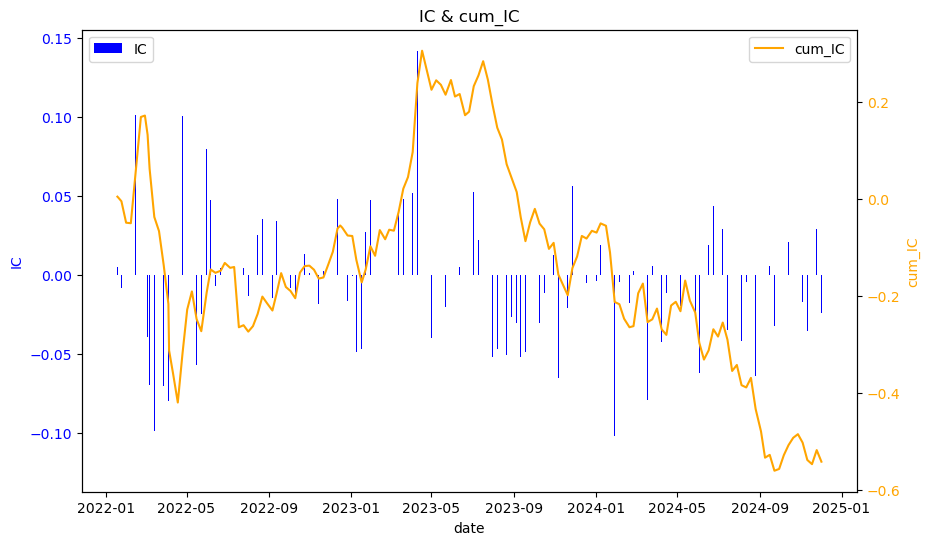

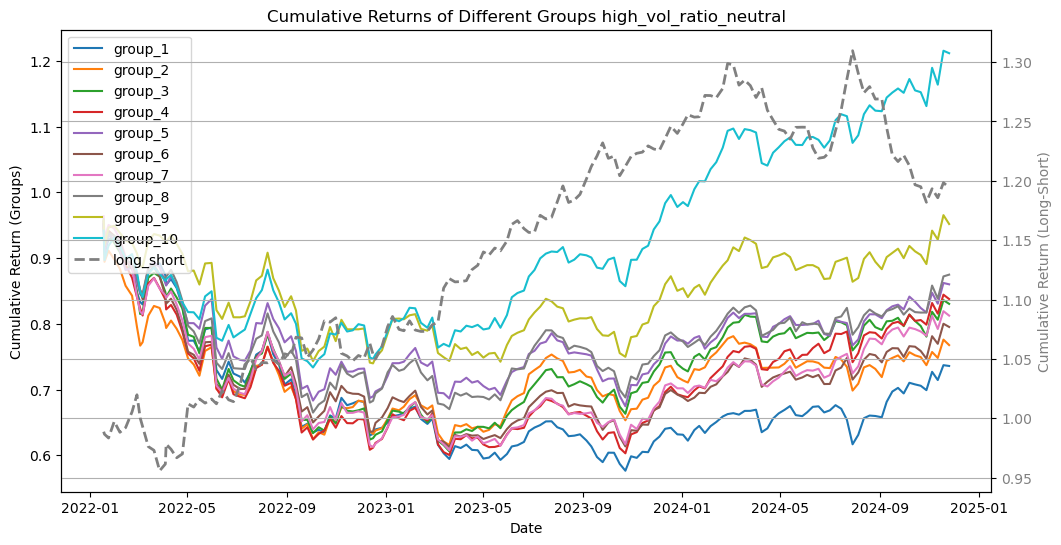


=== Backtesting statistical metrics ===
transaction_cost: 0.10%(single side)
Annualized return:
group_1      -0.0858
group_2      -0.0721
group_3      -0.0457
group_4      -0.0433
group_5      -0.0354
group_6      -0.0611
group_7      -0.0535
group_8      -0.0298
group_9      -0.0032
group_10      0.0755
long_short    0.0605
dtype: float64

Annualized volatility:
group_1       0.1695
group_2       0.1689
group_3       0.1734
group_4       0.1704
group_5       0.1661
group_6       0.1656
group_7       0.1688
group_8       0.1669
group_9       0.1607
group_10      0.1586
long_short    0.0694
dtype: float64

Sharpe ratio:
group_1      -0.5062
group_2      -0.4269
group_3      -0.2636
group_4      -0.2541
group_5      -0.2131
group_6      -0.3690
group_7      -0.3169
group_8      -0.1786
group_9      -0.0199
group_10      0.4760
long_short    0.8718
dtype: float64

max drawback:
group_1      -0.3937
group_2      -0.3489
group_3      -0.3664
group_4      -0.3711
group_5      -0.2907
group_

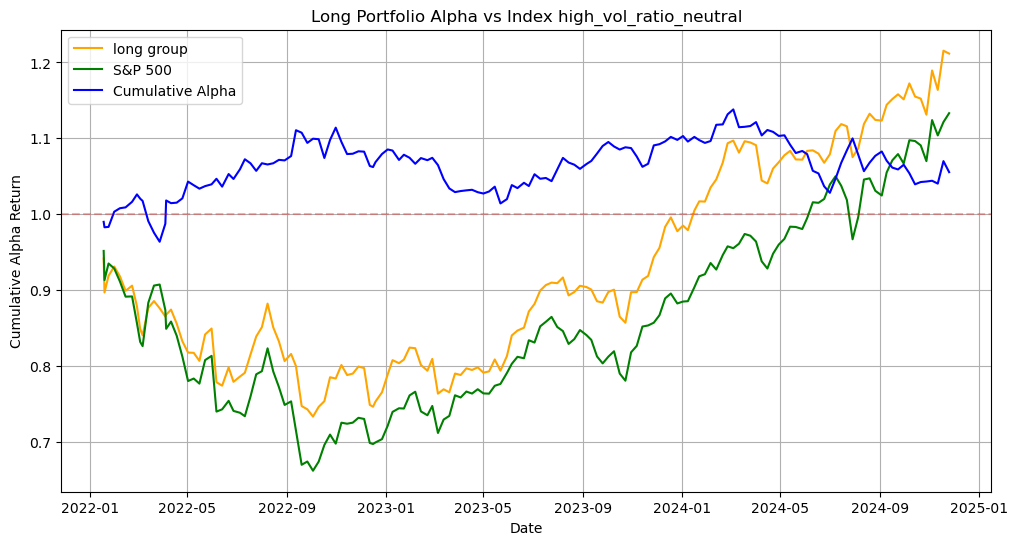


=== Alpha statistical metrics ===
Annualized alpha: 0.0207
Alpha volatility: 0.0774
Alpha sharpe: 0.2674
Alpha max drawdown: -0.0965
 


In [26]:

# fourth step: icir analysis
ic_l = cal_icir(factor_merged_high, 'high_vol_ratio_neutral', 'w')

# fifth step: group backtest
group_backtest(factor_merged_high, 'high_vol_ratio_neutral', 10, 'w', 0.001,'positive', sp500_data)

# for multi-factors, we should use factor_weighting()
print(' ')


In [27]:
# third step: neutralization
factor_merged_low = neutralization(factor_merged_low, 'low_vol_ratio')
factor_merged_low

,Ticker,Date,Adj Close,Close,High,Low,Open,Volume,Adjustment Factor,Adj Open,Adj High,Adj Low,Name,Industry,value,low_vol_ratio,low_vol_ratio_neutral
0,ADI,2022-01-18,157.677689,166.500000,170.119995,166.169998,168.690002,4160300.0,0.947013,159.751650,161.105872,157.365173,"Analog Devices, Inc.",Technology,8.746756e+10,0.553477,0.408811
1,ADM,2022-01-18,65.979187,71.269997,71.519997,70.470001,70.959999,2094000.0,0.925764,65.692202,66.210628,65.238580,Archer Daniels Midland Company,Consumer Defensive,3.991120e+10,-0.301132,-0.132799
2,ADP,2022-01-18,212.604355,226.440002,227.820007,222.759995,226.000000,1939500.0,0.938899,212.191237,213.900040,209.149198,Automatic Data Processing,Technology,9.519538e+10,0.389513,0.244548
3,ADSK,2022-01-18,252.029999,252.029999,257.989990,251.199997,253.899994,1612900.0,1.000000,253.899994,257.989990,251.199997,Autodesk Inc,Technology,5.543990e+10,0.514019,0.370968
4,AEE,2022-01-18,79.982712,87.620003,87.980003,86.449997,87.680000,1202700.0,0.912836,80.037480,80.311333,78.914688,Ameren Corporation,Utilities,2.257967e+10,-0.054731,0.409691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358808,XYL,2024-12-06,126.370003,126.370003,127.739998,126.129997,127.000000,980200.0,1.000000,127.000000,127.739998,126.129997,Xylem Inc,Industrials,3.070092e+10,-0.852748,-0.563450
358809,YUM,2024-12-06,137.630005,137.630005,139.600006,137.399994,138.570007,968000.0,1.000000,138.570007,139.600006,137.399994,"Yum! Brands, Inc.",Consumer Cyclical,3.840866e+10,0.025437,-0.019742
358810,ZBH,2024-12-06,108.029999,108.029999,109.860001,107.709999,109.540001,1141100.0,1.000000,109.540001,109.860001,107.709999,"Zimmer Biomet Holdings, Inc.",Healthcare,2.150593e+10,0.038176,-0.424434
358811,ZBRA,2024-12-06,409.320007,409.320007,413.059998,405.200012,406.600006,222800.0,1.000000,406.600006,413.059998,405.200012,Zebra Technologies Corporation,Technology,2.111274e+10,0.968185,1.269657


the factor's ic is -0.0015379510021287395
the factor's ir is -0.03786842416824385




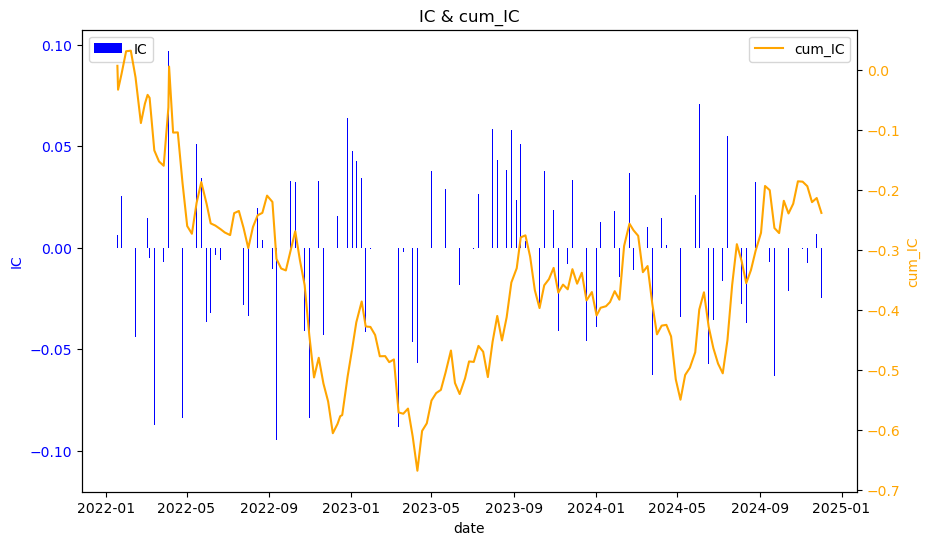

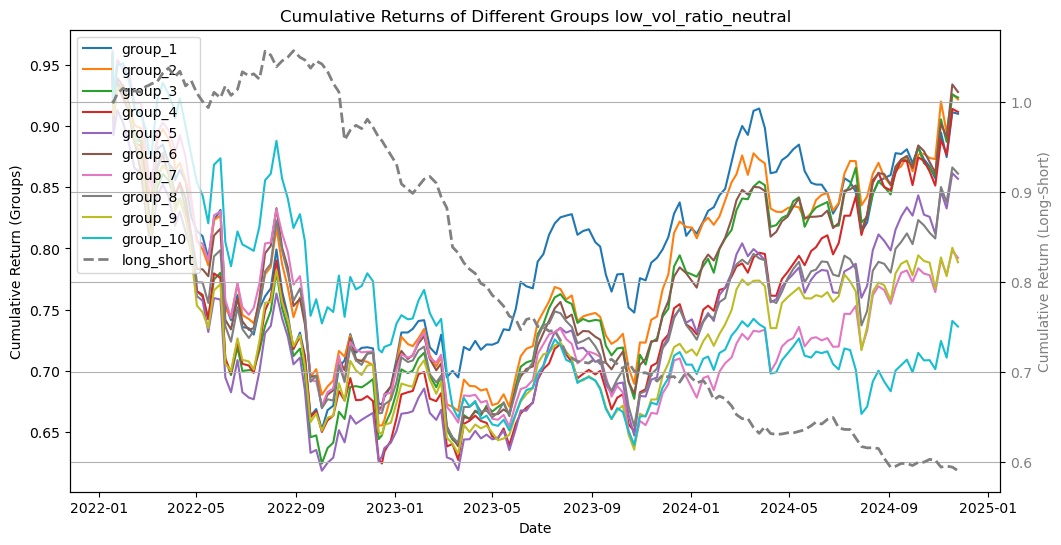


=== Backtesting statistical metrics ===
transaction_cost: 0.10%(single side)
Annualized return:
group_1      -0.0181
group_2      -0.0130
group_3      -0.0113
group_4      -0.0155
group_5      -0.0365
group_6      -0.0106
group_7      -0.0624
group_8      -0.0346
group_9      -0.0629
group_10     -0.0868
long_short   -0.1694
dtype: float64

Annualized volatility:
group_1       0.1592
group_2       0.1652
group_3       0.1720
group_4       0.1717
group_5       0.1671
group_6       0.1667
group_7       0.1655
group_8       0.1691
group_9       0.1710
group_10      0.1626
long_short    0.0738
dtype: float64

Sharpe ratio:
group_1      -0.1137
group_2      -0.0787
group_3      -0.0657
group_4      -0.0903
group_5      -0.2184
group_6      -0.0636
group_7      -0.3770
group_8      -0.2046
group_9      -0.3678
group_10     -0.5338
long_short   -2.2954
dtype: float64

max drawback:
group_1      -0.3179
group_2      -0.3147
group_3      -0.3406
group_4      -0.3392
group_5      -0.3449
group_

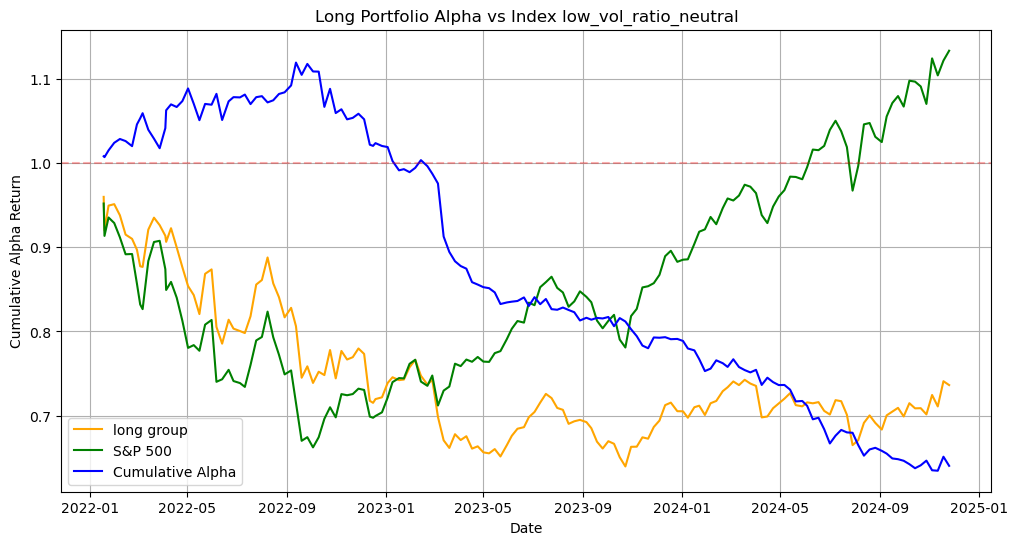


=== Alpha statistical metrics ===
Annualized alpha: -0.1416
Alpha volatility: 0.0889
Alpha sharpe: -1.5928
Alpha max drawdown: -0.4329
 


In [28]:
# fourth step: icir analysis
ic_l = cal_icir(factor_merged_low, 'low_vol_ratio_neutral', 'w')

# fifth step: group backtest
group_backtest(factor_merged_low, 'low_vol_ratio_neutral', 10, 'w', 0.001,'positive', sp500_data)

# for multi-factors, we should use factor_weighting()
print(' ')
